# Perceptron

In [1]:
import numpy as np
from collections import namedtuple 
from arftools import *
from numpy import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
Fonction = namedtuple ( "Fonction",["f","grad","dim"])
 
def v2m(x): 
    return x.reshape((1,x.size)) if len(x.shape )==1 else x

def optimize(fonc,eps=(1e-4),maxiter=100,xinit=None):
    if xinit == None:
        xinit= np.random.rand(100)
    x = xinit
    log_x    = np.array(x)
    log_f    = np.array(fonc.f(x))
    log_grad = np.array(fonc.grad(x))
    cpt = 0
    
    while cpt < maxiter :
        x = x-eps*fonc.grad(x)
        log_x = np.vstack((log_x,x))
        log_f = np.vstack((log_f,fonc.f(x)))
        log_grad = np.vstack((log_grad,fonc.grad(x)))
        cpt += 1 
    return (log_x, log_f, log_grad) 
      
def hinge(data,y,w): 
    return np.maximum(-data.dot(w.T)*y,0)

def hinge_grad(data,y,w): 
    return ((np.sign(hinge(data,y,w)).T*(-y))*(data.T)).T

## Perceptron Classifier

In [3]:
class Perceptron(Classifier):
    
    def __init__(self,loss=None, maxiter =100,eps=1e-4,dim=2):
        self.maxiter = maxiter
        self.eps = eps
        self.loss = loss
        self.dim = dim
    
    def fit (self , datax , datay ):
        self.datax = datax
        self.datay = datay
        self.fonc = Fonction ( self.f, self.f_grad ,0)
        self.log_x, self.log_f, self.log_grad = optimize(self.fonc,xinit = np.array(random.random(self.dim)*(10)-5))  
        self.w =  self.log_x[-1]       
        
    def predict(self, testX):
        X = v2m(testX)
        return np.sign(X.dot(self.w))
    
    def score (self, datax , datay ):
        pass
    
    def f(self,w):
        return hinge(self.datax,self.datay,w).sum()

    def f_grad(self,w):
        return hinge_grad(self.datax,self.datay,w).sum(0)

## Draw the learning trajectory in the weight space

In [4]:
def traceTrajectoire(perc,m=5):
    grid, xx, yy = make_grid(xmin = -5, xmax = 5, ymin = -5, ymax = 5)
    z=np.reshape([perc.f(w) for w in grid],xx.shape)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap=cm.gist_rainbow, linewidth=0, antialiased=False)
    fig.colorbar(surf)
    ax.plot(perc.log_x[:,0],perc.log_x[:,1],perc.log_f.ravel(),color='black')
    plt.show()
    plt.close(fig)


la trajectoire de l'apprentissage dans l'espace des poids:


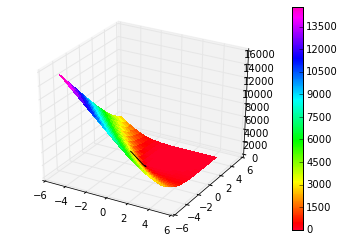


les frontières obtenues dans l'espace d'exemple:


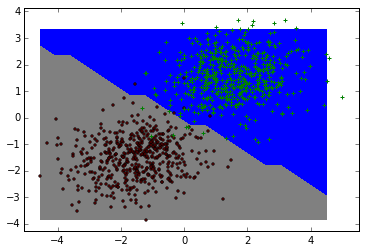

In [5]:
dataX,dataY=gen_arti(data_type=3)
testX ,testY  = gen_arti(data_type=3)

per = Perceptron()
per.fit(dataX,dataY)    
print "\nla trajectoire de l'apprentissage dans l'espace des poids:"
traceTrajectoire(per)
print "\nles frontières obtenues dans l'espace d'exemple:"
plot_frontiere(testX,per.predict)
plot_data(testX,testY)

## Consideration of a bias

In [7]:
class PerceptronBias(Perceptron):
    def fit(self,datax,datay,bias=None):
        if bias is None:
            bias=np.zeros(len(datax[0]))
        self.datax = datax - bias
        self.datay = datay
        self.fonc = Fonction ( self.f, self.f_grad ,0)
        self.log_x, self.log_f, self.log_grad = optimize(self.fonc,xinit = np.array(random.random(self.dim)*(10)-5))  
        self.w =  self.log_x[-1]



prends en compte le biais: 


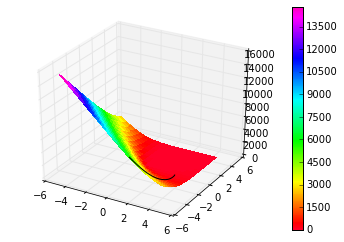

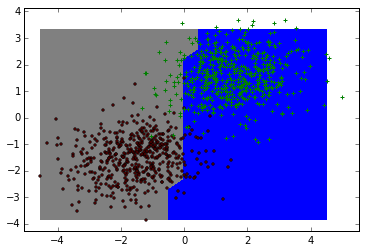

In [8]:
print "\nprends en compte le biais: "
perc = PerceptronBias()
perc.fit(dataX,dataY)
traceTrajectoire(perc)
plot_frontiere(testX,perc.predict)
plot_data(testX,testY)

## Mean Squared Error Version

In [9]:
def mse(datax,datay,w):
    return ((datay - datax.dot(w.T))**2)/2
    
def mse_g(datax,datay,w):
    return -(datay - datax.dot(w.T)).dot(datax)

class PerceptronMse(Perceptron):
    def fit (self , datax , datay ):
        self.datax = datax
        self.datay = datay
        self.fonc = Fonction ( self.f, self.f_grad ,0)
        self.log_x, self.log_f, self.log_grad = optimize(self.fonc,xinit = np.array(random.random(self.dim)*(10)-5))  
        self.w =  self.log_x[-1]
    
    def f(self,w):
        return mse(self.datax,self.datay,w).sum()
    def f_grad(self,w):
        return mse_g(self.datax,self.datay,w).sum(0)


prends en compte les moindres carrées : 


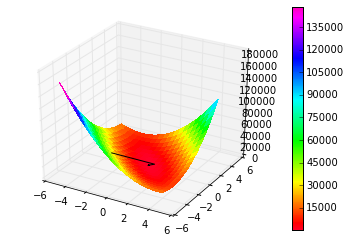

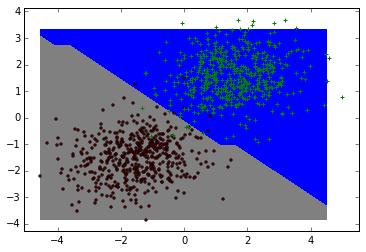

In [17]:
print "\nprends en compte les moindres carrées : "
percMse = PerceptronMse()
percMse.fit(dataX,dataY)

traceTrajectoire(percMse)
plot_frontiere(testX,percMse.predict)
plot_data(testX,testY)